#### import modules and packages

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd

import matplotlib.pyplot as plt
from datetime import datetime as dt

from onc.onc import ONC

import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from collections import Counter
from pylab import rcParams
from kneed import KneeLocator


rcParams['figure.figsize'] = 14,6

%matplotlib inline

#### Load data

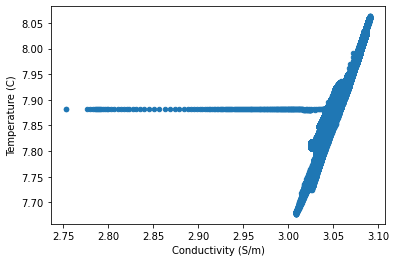

In [2]:
df = pd.read_csv('BaynesSoundMooring_40mbss_ConductivityTemperatureDepth_20200305T000000Z_20200313T210509Z-NaN.csv',skipinitialspace=True)
df.rename(columns={df.columns[0]: 'UTC time', df.columns[1]: 'Conductivity (S/m)',df.columns[15]: 'Temperature (C)'},inplace=True)
fig = df.plot.scatter(x='Conductivity (S/m)',y='Temperature (C)')

#### Preparing DBSCAN model ( train model and identify outliers)

In [3]:
# prepare data for model
X = df[['Conductivity (S/m)','Temperature (C)']]
df = X.copy()

When it comes to clustering, especially the density-based approach, it is crucial to prepare the data before putting it into the model. While you may want to perform multiple transformations, the most common one is scaling.

#### Tuning parameters for DBSCAN

In [4]:
neigh = NearestNeighbors(n_neighbors = df.shape[1]*2)
nbrs = neigh.fit(X)

distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis = 0)
distances = distances[:,1] # last cell of each row represents the distanct of k's fastest  point

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')


db1 = DBSCAN(eps=distances[knee.knee], min_samples=df.shape[1]*2).fit(X)
labels = db1.labels_

In [5]:
len(set(labels))

31999

In [7]:
#identifying the points which makes up our core points
sample_cores=np.zeros_like(labels,dtype=bool)
sample_cores[db1.core_sample_indices_]=True

#Calculating the number of clusters
n_clusters=len(set(labels))- (1 if -1 in labels else 0)
print(n_clusters)

31998


In [ ]:
# Create empty lists
S=[] # this is to store Silhouette scores
comb=[] # this is to store combinations of epsilon / min_samples

# Define ranges to explore
eps_range=range(6,12) # note, we will scale this down by 100 as we want to explore 0.06 - 0.11 range
minpts_range=range(3,8)

for k in eps_range:
    for j in minpts_range:
        # Set the model and its parameters
        model = DBSCAN(eps=k/100, min_samples=j)
        # Fit the model 
        clm = model.fit(X)
        # Calculate Silhoutte Score and append to a list
        S.append(metrics.silhouette_score(X, clm.labels_, metric='euclidean'))
        comb.append(str(k)+"|"+str(j)) # axis values for the graph

# Plot the resulting Silhouette scores on a graph
plt.figure(figsize=(16,8), dpi=300)
plt.plot(comb, S, 'bo-', color='black')
plt.xlabel('Epsilon/100 | MinPts')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score based on different combnation of Hyperparameters')
plt.show()

The metric score comes to be negative and it means that the samples are assigned to the wrong cluster. The score comes in between “1” to “-1” where “1” indicates good values and “-1” indicates the worst value.

In [ ]:
# Separate outliers from clustered data
outliers_X = X[labels == -1]
clusters_X = X[labels != -1]

In [ ]:
colors_clusters = labels[labels != -1]
colors_outliers = 'black'

In [ ]:
# get info about the clusters
clusters = Counter(labels)
print(clusters)
print('Number of cluster = {}'.format(len(clusters)-1))

In [ ]:
# plot clusters and outliers
fig = plt.figure()
ax = fig.add_axes([.1, .1, 1, 1])

ax.scatter(outliers_X.iloc[:,0],outliers_X.iloc[:,1], c = colors_outliers,s =50)
ax.scatter(clusters_X.iloc[:,0],clusters_X.iloc[:,1], c = colors_clusters,s =50)
plt.ylabel("Conductivity (S/m)")
plt.xlabel("Temperature (C)")
plt.tight_layout()

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(X,labels)

In [ ]:
db2 = DBSCAN(eps=ep1, min_samples=0.01, algorithm ='ball_tree').fit(X)

In [ ]:
labels2 = db2.labels_

In [ ]:
silhouette_score(X,labels2)

In [ ]:
db3 = DBSCAN(eps=ep1, min_samples=0.01, algorithm ='kd_tree').fit(X)

In [ ]:
labels3 = db3.labels_

In [ ]:
silhouette_score(X,labels3)

In [ ]:
db4 = DBSCAN(eps=ep1, min_samples=0.01, algorithm ='brute').fit(X)

In [ ]:
labels4 = db4.labels_

In [ ]:
silhouette_score(X,labels4)

In [ ]:
db5 = DBSCAN(eps=ep1, min_samples=10,algorithm='ball_tree', metric='haversine').fit(X)
labels5 = db5.labels_
silhouette_score(X,labels5)

In [ ]:
def pnorm(x,y):
  return np.sum(np.abs(x-y)**1)**(1/1)
    # np.sum(np.abs(x-y)**p)**(1/p)

db6 = DBSCAN(eps=ep1, min_samples=10,algorithm='ball_tree', metric=pnorm).fit(X)
labels6 = db5.labels_
silhouette_score(X,labels6)